##  KNN
K Near Neighbors

Si tengo los siguientes 3 puntos con sus repectivas etiquetas.
X = [[4,5],[3,5],[3,4.4]], y = [4, 4.5, 4.3]

Y deseo predecir un nuevo dato.

$X_{new}$ = [3, 3] , y=?

## Distancias

Podemos utilizar cualquier tipo de distancia. Norma_1 tambien es conocida como Manhattan distance.

${N_1 = |X_{0,0} - X_{1,0}|_1^1+ |X_{1,1} - X_{1,1}|_1^1}$

Norma_2, es la distancia euclidiana.

${N_2 = \sqrt{(X_{0,0} - X_{1,0})^2 + (X_{1,1} - X_{1,1})^2}}$

## K es el numero de vecinos
K es el numero de vecinos que se consideran en la prediccion.

Si es regresion: Osea que el valor a predecir es un valor continuo
### K es 1
para K=1
Para nuestro ejemplo cuando llega el nuevo dato [3, 3].


$y^* = y_i, i,{argmin(||D||)}$

Las distancias del nuevo dato al punto 1 es [ 3], al punto 2 es [ 2] y al punto 3 [1.4]. Por lo que el valor a 

retornar es 4.3. Que es el indice 3 del vector y.

### K es 2
$y^* = {1\over2}{{\sum}_{i=1}^{k=2}{Y_i, args(sorted(||D||)) }}$

Cuando K=2 el valor a retornar es el promedio del valor de *y* para los puntos 2 y 3.

El resultado es 4.4

### K es cualquier valor

$y^* = {{1}\over{K}}{{\sum}_{i=1}^{k=K}{Y_i, args(sorted(||D||)) }}$


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

In [3]:
class KNN:
    def __init__(self, K, classifier=False):
        self.K = K
        self.classifier = classifier
    def train(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_new):
        n = len(self.X)
        y_hat = []
        for X_new_i in X_new:
            dis = []
            i = 0            
            for rows in self.X:
                measure_dis = 0
                for j in range(len(rows)):
                    measure_dis += abs(rows[j] - X_new_i[j]) 
                dis.append((measure_dis,i))
                i = i + 1
            dis = sorted(dis, key=lambda dis: dis[0])
            if self.classifier:
                y_hat_i =  stats.mode([self.y[elm_d[1]] 
                                       for elm_d in dis[:self.K]])[0][0]
            else:
                y_hat_i =  np.mean([self.y[elm_d[1]] for elm_d in dis[:self.K]])
            y_hat.append(y_hat_i)
        return y_hat

In [4]:
K = 2
knn = KNN(K)
X = [[4,5],[3,5],[3,4.4]]
y = [4, 4.5, 4.3]
knn.train(X,y)
new_datos =  [[3, 3],[3, 4.8]]
y_hat = knn.predict(new_datos)
print("La predictioncon K={0}, es y_hat={1}".format(K,y_hat))

La predictioncon K=2, es y_hat=[4.4, 4.4]


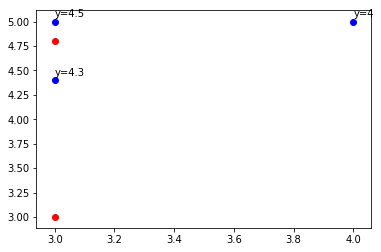

In [5]:
fig, ax = plt.subplots()
marg = 0.05
ax.scatter(np.array(X)[:,0], np.array(X)[:,1],c='b')
for row,y_text in zip(np.array(X),y):
    ax.text(row[0], row[1]+marg, "y=%s"%y_text)
for new_dato in new_datos:
    ax.scatter(new_dato[0],new_dato[1],c='r')
plt.show()

## Utilizar real data!!
Vamos a utilizar un dataset de verdad. Donde podamos explicar como es una implementacion en produccion

In [6]:
import os
import glob
import pickle
import numpy as np
import itertools
from urllib.request import urlretrieve
from os.path import isfile, isdir
from sklearn.decomposition import PCA
import tarfile

In [7]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'cifar-10-python.tar.gz')
    if not isfile(path_tar):
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            path_tar)
    dest_path =  "data"
    with tarfile.open(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [12]:
def get_data():
    """
    Este metodo lee los archivos descargados y crea una matriz con todos los ejemplos
    """
    folder = os.path.join("data",'cifar-10-batches-py')
    list_train = []
    test = None
    names_labels = None
    for n_file in glob.os.listdir(folder):
        if '_batch' in n_file:
            with open(os.path.join(folder,n_file),'rb') as temp_file:
                
                if 'test' in temp_file.name:
                    test = pickle.load(temp_file, encoding='latin1')
                else:
                    list_train.append(pickle.load(temp_file, encoding='latin1'))
        elif 'batches.meta' in n_file:
            with open(os.path.join(folder,n_file),'rb') as temp_file:
                names_labels = pickle.load(temp_file, encoding='latin1')["label_names"]
    X_test = test["data"]
    y_test = test["labels"]
    X_train = None
    y_train = None
    while len(list_train)>0:
        elem_dic = list_train.pop()
        if X_train is None:
            X_train = elem_dic["data"]
            y_train = elem_dic["labels"]
        else:
            X_train = np.concatenate((X_train, elem_dic["data"]),axis=0)
            y_train = np.concatenate((y_train, elem_dic["labels"]),axis=0)
    return X_train, y_train, X_test, y_test, names_labels  

In [13]:
fn_shape = lambda X: X.reshape(3, 32, 32).transpose(1, 2, 0)
X_train, y_train, X_test, y_test, names_labels = get_data()

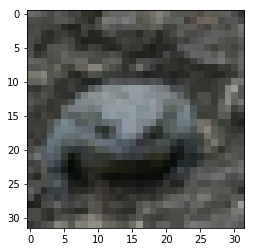

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(fn_shape(X_train[25]))
plt.show()

Como se ve en la imagen anterior tenemos los pixeles de la imagen, y 10 tipos de imagenes diferentes.

In [15]:
print(y_train[6])
print(names_labels)
print(len(X_train[6]),X_train[6].reshape(3, 32, 32).shape)

8
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
3072 (3, 32, 32)


Nuestro KNN se basa en la distancia. Cada elemento de la matrix es un pixel. Podemos observar que la distancia de la imagen 8 es menor que la distancia de la imagen 6.

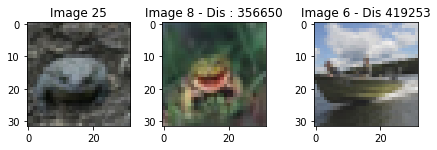

In [27]:
fig, ax = plt.subplots(1,3, constrained_layout=True)
ax[0].imshow(fn_shape(X_train[25]))
ax[0].set_title(label="Image 25")
ax[1].imshow(fn_shape(X_train[8]))
ax[1].set_title(label="Image 8 - Dis : %s"%sum(abs(X_train[25] - X_train[8])))
ax[2].imshow(fn_shape(X_train[6]))
ax[2].set_title(label="Image 6 - Dis %s"%sum(abs(X_train[25] - X_train[6])))
plt.show()

Vamos a probar cual es la prediccion de nuestro KNN. Utilizando 1000 imagenes en training y 100 imagenes en test. Se puede observar claramente que esta implementacion toma al menos 10 minutos para predecir 100 registros.

In [98]:
%%time
l = 1000
l_t = 30
s_X_train, s_y_train = X_train[:l], y_train[:l]
s_X_test, s_y_test = X_test[:l_t], y_test[:l_t]
K = 10
knn = KNN(K,classifier=True)
knn.train(s_X_train.tolist(),s_y_train.tolist())
y_hat = knn.predict(s_X_test)
print(y_hat)
print(s_y_test)
fn_accuracy = lambda y_hat,y_test: np.mean([1 if y_hat[i]==y_i else 0 
                                                for i,y_i in enumerate(y_test)])
print(fn_accuracy(y_hat,s_y_test))

[2, 8, 8, 8, 4, 6, 6, 4, 4, 8, 0, 8, 6, 6, 2, 2, 3, 4, 1, 4, 0, 0, 4, 4, 2, 2, 4, 8, 2, 4]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6]
0.26666666666666666
CPU times: user 7min 51s, sys: 2.03 s, total: 7min 53s
Wall time: 8min


## Reduccion de la dimensionalidad
Una alternativa para resolver la velocidad es utilizar PCA. Esta es una tecnica que reduce la dimensionalidad de los datos. Intenta transformar los datos a una menor numero de dimensiones de forma que se minimice el error al reconstruir la informacion original.
En el siguiente ejemplo, utilizamos PCA para pintar las imagenes que tienen 3072 columnas a 2 dimensiones. En otras palabras, representamos las imagenes en 2 dimensiones.

<Figure size 432x288 with 0 Axes>

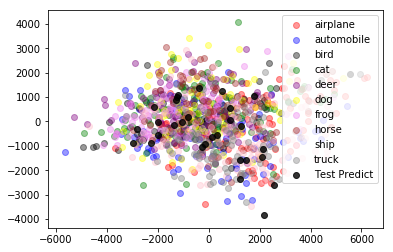

In [48]:
def reduce_dim_pca(components, X_train, X_test):
    """
    This method reduce the dimensionality of the Train and Test Matrix.
    """
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    return X_r, X_nr

X_r, X_nr = reduce_dim_pca(2, s_X_train, s_X_test)

plt.figure()
c_scale = ['red', 'blue', 'black','green',
           'purple','yellow','violet',
           'brown','pink','gray']
colors = [(ix,color) 
          for ix, color in enumerate(c_scale)]
lw = 1
fig, ax = plt.subplots()
for color, target_name in zip(colors, names_labels):
    ax.scatter(X_r[s_y_train == color[0], 0], X_r[s_y_train == color[0], 1],
                color=color[1], alpha=.4, lw=lw,
                label=target_name)
    
ax.scatter(X_nr[:,0], X_nr[:,1],
            color='black', alpha=.8, lw=lw,
            label="Test Predict")
ax.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

## Seep up.
Nuestro KNN, realiza N (Numero de elemento en training), D(Numero de columnas) * M numero de elementos a predecir.
Si reducimos el numero de columnas de 3072 a 20. Nuestro KNN se demora aproimadamente 15 segundos para predecir 200 imagenes y compararlas con 20000 imagenes.

** Se observa que solo incrementar el numero de imagenes en training incrementa el accuracy de nuestro modelo.

In [72]:
l = 50000
l_t = 100
s_X_train, s_y_train = X_train[:l], y_train[:l]
s_X_test, s_y_test = X_test[:l_t], y_test[:l_t]
X_r, X_nr = reduce_dim_pca(30, s_X_train, s_X_test)

In [73]:
%%time
K = 30
knn = KNN(K,classifier=True)
knn.train(X_r.tolist(),s_y_train.tolist())
y_hat = knn.predict(X_nr.tolist())
print(y_hat)
print(s_y_test)
fn_accuracy = lambda y_hat,y_test: np.mean([1.0 if y_hat[i]==y_i else 0.0 
                                                for i,y_i in enumerate(y_test)])
print("Accuracy Loop_KNN with PCA:", fn_accuracy(y_hat,s_y_test))

[2, 8, 8, 8, 4, 6, 6, 2, 2, 8, 0, 8, 6, 1, 1, 8, 5, 4, 8, 6, 1, 0, 0, 9, 2, 6, 7, 7, 9, 6, 6, 2, 4, 6, 9, 1, 4, 8, 8, 8, 0, 6, 3, 4, 0, 8, 3, 8, 4, 4, 8, 8, 6, 4, 8, 8, 4, 6, 0, 2, 4, 6, 6, 9, 6, 4, 1, 0, 6, 9, 2, 6, 8, 8, 0, 6, 6, 3, 6, 8, 8, 1, 4, 8, 2, 7, 3, 8, 8, 8, 0, 6, 8, 6, 4, 3, 2, 0, 0, 7]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]
Accuracy Loop_KNN with PCA: 0.43
CPU times: user 42.9 s, sys: 827 ms, total: 43.7 s
Wall time: 46.7 s


## Nuestro KNN
Esta un poco lento. Con los resultados que tenemos se hace dificil predecir muchos datos.
Con mas de 100 datos a predecir, Y con menos de mil en el training se torna lento.


${d = sum((Xtrain_{0,0}- Xtest_{0,0})^2+(Xtrain_{0,1}- Xtest_{0,1})^2)}$

${d = sum(Xtrain_{0,0}^2 -2Xtrain_{0,0}Xtest_{0,0}+Xtest_{0,0}^2+Xtrain_{0,1}^2-2Xtrain_{0,1}Xtest_{0,1}+Xtest_{0,1}^2)}$

${d = sum(Xtrain_{0,0}^2 + Xtrain_{0,1}^2 -2Xtrain_{0,0}Xtest_{0,0}-2Xtrain_{0,1}Xtest_{0,1}+Xtest_{0,0}^2+Xtest_{0,1}^2)}$

si Xtrain y Xtest son matrices, Utilizando la distancia euclidiana tenemos que 

${d = Xtrain*Xtrain^T -2*Xtrain * Xtest^T+ Xtest*Xtest^T }$

In [61]:
class KNN_Matrix (KNN):
    """
    This class extend the initial implementation of the KNN.
    And we rewrite the predict in a vectorized opperation
    """
    def predict(self, X_new, verbose=False):
        y_hat = []
        self.X =  np.array(self.X)
        self.y = np.array(self.y)
        X_new = np.array(X_new)
        X_Xnew_2 = -2 * np.dot(self.X, X_new.T)
        X_sq = np.power(self.X, 2).sum(axis=1).reshape((-1, 1))
        X_new_sq = np.power(X_new, 2).sum(axis=1)
        #No se necesita sqrt
        distance = X_sq + X_Xnew_2 + X_new_sq
        if verbose: print('Distancia: \n',distance)
        arg_ix = distance.argsort(axis=0).T[:,:self.K]
        for row in arg_ix:
            if self.classifier:
                y_hat_i =  stats.mode(self.y[row])[0][0]
            else:
                y_hat_i =  np.mean(self.y[row] )
            y_hat.append(y_hat_i)
        return y_hat

In [62]:
# Ejemplo simple
K = 2
X = [[4,5],[3,5],[3,4.4]]
y = [4, 4.5, 4.3]
knn.train(X,y)
new_datos =  [[3, 3],[3, 4.8]]
knn_m = KNN_Matrix(K,classifier=False)
knn_m.train(X,y)
y_hat = knn_m.predict(new_datos,verbose=True)
y_hat

Distancia: 
 [[5.   1.04]
 [4.   0.04]
 [1.96 0.16]]


[4.4, 4.4]

## KNN with Matrix
Al implementar nuestro KNN con matrix podemos utilizar todas la dimensiones de las imagenes. Y logramos tener un tiempo de menos de 15 segundos para comparar 100 imagenes de test con 20000 imagenes en training.

* Optimizamos nuestro modelo, sin embargo, el accuracy del KNN, es menor que cuando utilizamos PCA. Esto se debe a un problema conocido como el curse of dimensionality. Y es que por cada columna nueva es necesario 10 veces mas datos $10^d$

In [95]:
%%time
l = 50000
l_t = 100
s_X_train, s_y_train = X_train[:l], y_train[:l]
s_X_test, s_y_test = X_test[:l_t], y_test[:l_t]
K = 13
knn_m = KNN_Matrix(K,classifier=True)
knn_m.train(s_X_train.tolist(),s_y_train.tolist())
y_hat = knn_m.predict(s_X_test)
print(y_hat)
print(s_y_test)
fn_accuracy = lambda y_hat,y_test: np.mean([1 if y_hat[i]==y_i else 0 
                                                for i,y_i in enumerate(y_test)])
print("Accuracy Matrix_KNN:", fn_accuracy(y_hat,s_y_test))

[2, 8, 8, 8, 4, 6, 6, 2, 2, 8, 0, 8, 3, 6, 4, 8, 3, 4, 1, 6, 2, 0, 0, 7, 2, 4, 4, 0, 6, 4, 6, 2, 2, 2, 8, 4, 2, 8, 4, 4, 0, 4, 6, 4, 0, 8, 5, 8, 4, 4, 8, 8, 6, 4, 8, 8, 2, 6, 8, 2, 4, 3, 6, 9, 4, 2, 8, 0, 3, 9, 2, 4, 8, 8, 9, 2, 6, 3, 6, 8, 8, 1, 4, 0, 2, 0, 5, 8, 8, 8, 0, 4, 8, 6, 4, 2, 4, 0, 0, 0]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]
Accuracy Matrix_KNN: 0.34
CPU times: user 32.7 s, sys: 5.03 s, total: 37.7 s
Wall time: 40.2 s


In [97]:
s_X_train, s_X_test = reduce_dim_pca(30, s_X_train, s_X_test)
K = 30
knn_m = KNN_Matrix(K,classifier=True)
knn_m.train(s_X_train.tolist(),s_y_train.tolist())
y_hat = knn_m.predict(s_X_test)
print(y_hat)
print(s_y_test)
fn_accuracy = lambda y_hat,y_test: np.mean([1.0 if y_hat[i]==y_i else 0. 
                                                for i,y_i in enumerate(y_test)])
print("Accuracy Matrix_KNN with PCA:",fn_accuracy(y_hat,s_y_test))

[2, 8, 8, 8, 4, 6, 6, 2, 2, 8, 0, 9, 4, 6, 8, 8, 5, 3, 8, 6, 1, 0, 0, 6, 4, 6, 7, 7, 9, 6, 6, 4, 4, 6, 8, 1, 4, 8, 8, 5, 0, 6, 1, 4, 0, 0, 5, 8, 4, 4, 9, 8, 6, 4, 8, 8, 4, 6, 0, 2, 4, 3, 6, 9, 6, 2, 1, 0, 2, 9, 2, 4, 8, 8, 9, 4, 9, 3, 6, 8, 8, 1, 6, 0, 2, 7, 2, 8, 8, 0, 0, 6, 8, 6, 2, 4, 4, 0, 0, 9]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]
Accuracy Matrix_KNN with PCA: 0.43


## Como seleccionar la K
Como tenemos un buen numero de datos. No es necesario tuilizar cross validation. En este caso solo necesitamos quitar el 10% de nuestro dataset de test y utilizar este como valdiacion.

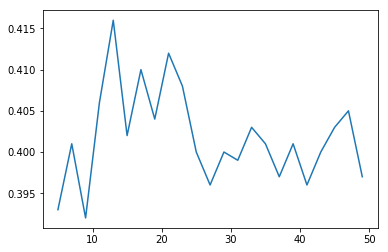

In [86]:
from sklearn.model_selection import train_test_split
fn_accuracy = lambda y_hat,y_test: np.mean([1.0 if y_hat[i]==y_i else 0. 
                                                for i,y_i in enumerate(s_y_val)])
l = 50000
l_t = 10000
s_X_train, s_y_train = X_train[:l], y_train[:l]
s_X_test, s_y_test = X_test[:l_t], y_test[:l_t]

s_X_train, s_X_test = reduce_dim_pca(30, s_X_train, s_X_test)
s_X_test, s_X_val, s_y_test, s_y_val  = train_test_split(s_X_test,s_y_test,
                                                test_size=0.10, random_state=42)
accuracy_list = []
K_list = list(range(5,50,2))
for K in K_list:
    knn_m = KNN_Matrix(K,classifier=True)
    knn_m.train(s_X_train.tolist(),s_y_train.tolist())
    y_hat = knn_m.predict(s_X_val)
    accuracy_list.append(fn_accuracy(y_hat,s_y_val))
    
fig, ax = plt.subplots()
ax.plot(K_list,accuracy_list)
ax.scatter(K_list,accuracy_list)
plt.show()

## Our best model is K=13, improvements?
* La mayoria de resultados en los modelos depende de nuestra capacidad de hacer ingenieria de de los features. Se deben realizar las siguientes operaciones.
- Normalizar los datos.
- Transofrmar las imagenes en scalas de grises.
- Realizar data augmentation, rotar mover, adicionar ruido a las imagenes.